<a href="https://colab.research.google.com/github/yoo9519-AIdev/Learning/blob/master/fit_to_video(%EC%B5%9C%EC%A2%85%EC%88%98%EC%A0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -L "https://public.roboflow.com/ds/8nhfMDr86Z?key=WnpUWjqvrH" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: export/labels/1478900208139809310_jpg.rf.aa22f718963fd74816c36362747a2e5f.txt  
 extracting: export/labels/1478897095754019307_jpg.rf.aa1b8183dcaef29a615c9912089c3473.txt  
 extracting: export/labels/1478732017007188764_jpg.rf.a9fa40fbacf90200f65b9f36c6b43131.txt  
 extracting: export/labels/1478900676026204617_jpg.rf.aa1a8e8719bef56f09a0d6dd90f3f3ea.txt  
 extracting: export/labels/1478732798092393026_jpg.rf.aa228f5791738d87d1bacf62531c0cda.txt  
 extracting: export/labels/1478896275952367309_jpg.rf.aa23b59b1d8d54f3a09132da9e8c2a6c.txt  
 extracting: export/labels/1478899778529718267_jpg.rf.aa0d63ee3bcb35c1afed21e6540cdd76.txt  
 extracting: export/labels/1478901473546608423_jpg.rf.aa261619fcf6bfccf9da09aa1b0757fc.txt  
 extracting: export/labels/1478898797054295338_jpg.rf.aa06d409796399ae7edf8356b00c26a5.txt  
 extracting: export/labels/1478897897272970447_jpg.rf.aa398fcc4dbe3f9dd7487082af324c00.txt  
 extracting: export/labels/1478896

In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 2535 (delta 10), reused 18 (delta 8), pack-reused 2513
Receiving objects: 100% (2535/2535), 5.39 MiB | 8.40 MiB/s, done.
Resolving deltas: 100% (1663/1663), done.


In [3]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
     |████████████████████████████████| 276kB 9.1MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=301cdc1311f299f17dacf4905ba7f5c9396d6dac3ba5783e1271eb7dd1ffb796
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
%cat /content/yolov5_vehicle/data.yaml

train: ../train/images
val: ../valid/images

nc: 11
names: ['biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red', 'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']

In [5]:
%cd /
from glob import glob

img_list = glob('/content/yolov5_vehicle/export/images/*.jpg')

print(len(img_list))

/
15000


In [6]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)

print(len(train_img_list), len(val_img_list))

12000 3000


In [7]:
with open('/content/yolov5_vehicle/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5_vehicle/val.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')

In [8]:
import yaml

with open('/content/yolov5_vehicle/data.yaml', 'r') as f:
    data = yaml.load(f) # json 부르는 거랑 똑같이

print(data)

data['train'] = '/content/yolov5_vehicle/train.txt'
data['val'] = '/content/yolov5_vehicle/val.txt'

with open('/content/yolov5_vehicle/data.yaml', 'w') as f:
    yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 11, 'names': ['biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red', 'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']}
{'train': '/content/yolov5_vehicle/train.txt', 'val': '/content/yolov5_vehicle/val.txt', 'nc': 11, 'names': ['biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red', 'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [9]:
%cd /content/yolov5/

!python train.py --img 416 --batch 16 --epochs 45 --data /content/yolov5_vehicle/data.yaml --cfg /content/yolov5/models/yolov5x.yaml --weights yolov5x.pt --name yolov5_autovehicle

/content/yolov5
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16130MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='/content/yolov5/models/yolov5x.yaml', data='/content/yolov5_vehicle/data.yaml', device='', epochs=45, evolve=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, logdir='runs/', multi_scale=False, name='yolov5_autovehicle', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5x.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
2020-09-15 00:07:41.370804: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'w

In [10]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/

<IPython.core.display.Javascript object>

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/yolov5_vehicle/export/images/1478732662175318143_jpg.rf.ca874ec8b7748c44c7c2f0b69cf6da3f.jpg', update=False, view_img=False, weights=['/content/yolov5/runs/exp0_yolov5_autovehicle/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 8.84579e+07 parameters, 8.45317e+07 gradients
image 1/1 /content/yolov5_vehicle/export/images/1478732662175318143_jpg.rf.ca874ec8b7748c44c7c2f0b69cf6da3f.jpg: 416x416 7 cars, Done. (0.020s)
Results saved to inference/output
Done. (0.082s)


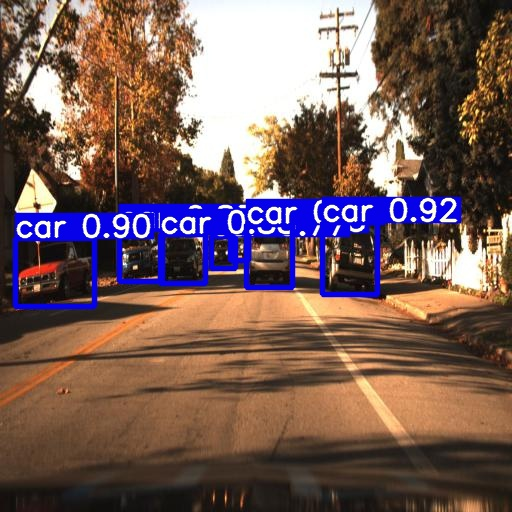

In [11]:
from IPython.display import Image
import os

val_img_path = val_img_list[0]

!python detect.py --weights /content/yolov5/runs/exp0_yolov5_autovehicle/weights/best.pt --img 416 --conf 0.2 --source "{val_img_path}"
Image(os.path.join('/content/yolov5/inference/output', os.path.basename(val_img_path)))

In [14]:
%%time
!python detect.py --weights /content/yolov5/runs/exp0_yolov5_autovehicle/weights/best.pt --img 416 --conf 0.2 --source blbox.MP4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='blbox.MP4', update=False, view_img=False, weights=['/content/yolov5/runs/exp0_yolov5_autovehicle/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16130MB)

Fusing layers... 
Model Summary: 284 layers, 8.84579e+07 parameters, 8.45317e+07 gradients
video 1/1 (1/1824) /content/yolov5/blbox.MP4: 288x416 2 cars, Done. (0.021s)
video 1/1 (2/1824) /content/yolov5/blbox.MP4: 288x416 1 cars, Done. (0.022s)
video 1/1 (3/1824) /content/yolov5/blbox.MP4: 288x416 1 cars, Done. (0.020s)
video 1/1 (4/1824) /content/yolov5/blbox.MP4: 288x416 1 cars, Done. (0.023s)
video 1/1 (5/1824) /content/yolov5/blbox.MP4: 288x416 Done. (0.020s)
video 1/1 (6/1824) /content/yolov5/blbox.MP4: 288x416 Done. (0.026s)
video 1/1 (7/1824) /content/yolov5/blbox.MP4: 288x416 Done. (0.022s)
video 1/1 (8/1824) 